# Calculation of projected stock repurchases through reinvestment (retained earnings)
### This calculation determines the projected number of new shares purchased through reinvestment of retained earnings and available liquidity.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import numpy as np
import math

In [2]:
"""
This script calculates the annual investment liquidity based on a given dataset 
and determines the time horizon in years for financial planning.

Steps:
1. Load a CSV file containing liquidity data into a pandas DataFrame.
2. Display the first few rows of the dataset for inspection.
3. Determine the time horizon in years based on the number of columns in the dataset.
"""

import pandas as pd

# Load the CSV file containing liquidity data, assuming it uses a semicolon as a delimiter.
liquidity_df = pd.read_csv('./data/liquidity.csv', delimiter=";")

# Display the first few rows of the loaded DataFrame to verify the data structure.
liquidity_df.head()

# Calculate the number of years (time horizon) based on the number of columns in the dataset.
years = len(liquidity_df.columns)  

# Print the calculated time horizon.
print("Horizont: " + str(years))


Horizont: 10


In [3]:
"""
This script processes stock data from an Excel file, initializes an empty list
based on the number of stock entries, and prints the number of entries.

Steps:
1. Load an Excel file containing stock data into a pandas DataFrame.
2. Display the first few rows of the dataset for verification.
3. Create an empty list with a size equal to the number of rows (entries) in the DataFrame.
4. Print the total number of entries in the initialized list.
"""

import pandas as pd

# Load the Excel file containing stock data into a DataFrame.
stock_data_df = pd.read_excel('./data/stock_data.xlsx')

# Display the first few rows of the loaded DataFrame to verify the data structure.
stock_data_df.head()

# Create an empty list with a size equal to the number of rows (entries) in the DataFrame.
stock_list = []*len(stock_data_df.axes[0])  # `len(stock_data_df.axes[0])` gives the row count.

# Print the total number of entries in the initialized list.
print(f"Number of entries: {len(stock_list)}")

Number of entries: 0


In [4]:
class Stock:
    """
    A class representing a stock, encapsulating its attributes such as symbol, stock price, 
    return rate, order fees, projected balances, opening balance, and share of the portfolio.
    
    Attributes:
    - symbol (str): The stock's ticker symbol.
    - stock_price (float): Assumed average stock price.
    - r (float): Return rate of the stock.
    - g (float): Order fees associated with the stock.
    - balance (list): A list representing projected quantities per period starting at t0.
    - opening_balance (float): Initial quantity of the stock.
    - share (float): Proportional share in the portfolio.
    
    Methods:
    - __init__: Constructor that initializes a Stock object with the given attributes.
    """
    
    def __init__(self, symbol: str, stock_price: float, r: float, order_fees: float, balance: list, opening_balance: float, share: float):
        """
        Initialize a Stock object with specified attributes.

        Args:
        - symbol (str): Stock ticker symbol.
        - stock_price (float): Average assumed stock price.
        - r (float): Return rate.
        - g (float): Order fees.
        - balance (list): List of projected quantities per period.
        - opening_balance (float): Initial stock quantity.
        - share (float): Portfolio share of the stock.
        """
        self.symbol = symbol  # Stock ticker symbol.
        self.stock_price = stock_price  # Assumed average stock price.
        self.r = r  # Stock return rate.
        self.order_fees = order_fees  # Order fees.
        self.balance = balance  # List of projected balances per period starting at t0.
        self.opening_balance = opening_balance  # Initial stock balance.
        self.share = share  # Proportional share in the portfolio.

        # Set the initial balance for the first period to the opening balance.
        balance[0] = opening_balance


In [5]:
import math

def calculate_balance(horizon: int, stock_price: float, r: float, order_fees: float, share: float, empty_balance: list):
    """
    Calculates the balance time series for a stock over a specified investment horizon.

    Args:
    - horizon (int): The investment horizon (number of periods).
    - stock_price (float): Assumed average stock price.
    - r (float): Return rate of the stock (e.g., dividend yield).
    - g (float): Order fees.
    - share (float): Share of available liquidity allocated to the stock.
    - empty_balance (list): An empty list to hold the balance time series.

    Returns:
    - list: A list representing the balance of the stock at each period.

    Method:
    1. Iterates through the given horizon, calculating the balance for each period.
    2. Checks whether the net dividend allows for new shares to be purchased.
    3. Updates the balance list based on the calculated values.
    """
    # Initialize the balance list with the provided empty list.
    balance = empty_balance

    # Iterate over the time horizon to calculate balances for each period.
    for t in range(horizon - 1):
        # Determine if new shares can be purchased with net dividend and liquidity.
        variable_balance = math.floor(
            ((balance[t] * stock_price * r * 0.7) + liquidity_df.iat[0, t] * share - order_fees) / stock_price
        )
        
        # Ensure variable_balance is non-negative (no negative shares).
        if variable_balance < 0:
            variable_balance = 0  
        
        # Update the balance for the next period.
        balance[t + 1] = balance[t] + variable_balance
    
    # Return the complete balance time series.
    return balance

In [6]:
def create_stock(symbol: str, stock_price: float, r: float, order_fees: float, balance: list, opening_balance: float, share: float):
    """
    Creates a new Stock object with the given parameters.

    Args:
    - symbol (str): The stock's ticker symbol.
    - stock_price (float): Assumed average stock price.
    - r (float): Return rate of the stock (e.g., dividend yield).
    - g (float): Order fees for the stock.
    - balance (list): A list to hold projected balances per period.
    - opening_balance (float): Initial quantity of the stock.
    - share (float): Proportional share in the portfolio.

    Returns:
    - Stock: A new Stock object initialized with the provided parameters.
    """
    # Create a new Stock object using the Stock class constructor.
    new_stock = Stock(symbol, stock_price, r, order_fees, balance, opening_balance, share)

    # Return the newly created Stock object.
    return new_stock

In [7]:
"""
This loop creates a Stock object for each stock in the dataset and populates a list of Stock objects.

Steps:
1. Initialize an empty balance list for each stock for the defined time horizon.
2. Calculate the balance time series for each stock using the `calculate_balance` function.
3. Create a Stock object using the calculated data.
4. Append the created Stock object to the `stock_list`.
5. Print intermediate results to verify the process.

Key Variables:
- stock_list: A list to hold all created Stock objects.
- stock_data_df: A DataFrame containing stock data, such as symbol, stock price, return rate, etc.
- years: The time horizon for investment.
"""

# Verify the initial length of the stock list.
print(len(stock_list))

# Iterate over all rows in the stock data DataFrame to create Stock objects.
for i in range(len(stock_data_df.axes[0])):
    # Create an empty balance list initialized with the horizon length.
    empty_balance = [None] * years  # Placeholder for balance values across the time horizon.
    empty_balance[0] = int(stock_data_df.at[i, 'opening_balance'])  # Set the opening balance for t=0.
    
    # Calculate the balance time series for the stock.
    calculated_balance = calculate_balance(
        horizon=years,
        stock_price=stock_data_df.at[i, 'stock_price'],
        r=stock_data_df.at[i, 'r'],
        order_fees=7,  # Fixed order fee.
        share=stock_data_df.at[i, 'share'],
        empty_balance=empty_balance
    )
    
    # Print the calculated balance for debugging/verification.
    print(calculated_balance)
    
    # Create a new Stock object using the calculated data.
    stock = create_stock(
        symbol=stock_data_df.at[i, 'symbol'],
        stock_price=stock_data_df.at[i, 'stock_price'],
        r=stock_data_df.at[i, 'r'],
        order_fees=7,
        balance=calculated_balance,
        opening_balance=stock_data_df.at[i, 'opening_balance'],
        share=stock_data_df.at[i, 'share']
    )
    
    # Append the created Stock object to the stock list.
    stock_list.append(stock)
    
    # Print the current length of the stock list for verification.
    print(f"Stock list length: {len(stock_list)}")

0
[135, 138, 142, 147, 153, 160, 169, 179, 190, 202]
Stock list length: 1
[40, 43, 48, 55, 64, 76, 90, 107, 127, 149]
Stock list length: 2
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Stock list length: 3
[11, 11, 11, 11, 12, 13, 14, 16, 18, 20]
Stock list length: 4


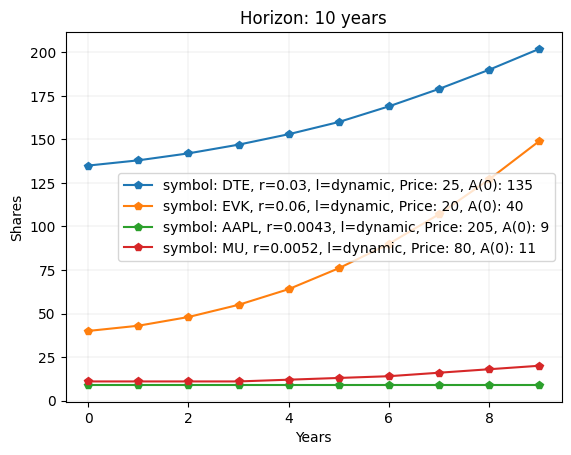

In [30]:
"""
This code snippet visualizes the balance time series for all stocks in the `stock_list` over a given horizon.

Steps:
1. Iterate over all Stock objects in the `stock_list`.
2. Plot the balance time series for each stock using matplotlib.
3. Customize the legend, title, axis labels, and grid for better readability.
"""

import matplotlib.pyplot as plt

# Iterate over all stocks in the stock list and plot their balance time series.
for stock in stock_list:
    plt.plot(
        range(years),  # X-axis: Time horizon (in years).
        stock.balance,  # Y-axis: Stock balance time series.
        "-p",  # Line style with points at each data value.
        label=f"symbol: {stock.symbol}, r={stock.r}, l=dynamic, Price: {stock.stock_price}, A(0): {stock.opening_balance}"
    )

# Add a legend with the best location based on available space.
plt.legend(loc='best')

# Add a title to the plot, specifying the investment horizon.
plt.title(f'Horizon: {years} years')

# Add labels to the x and y axes.
plt.xlabel('Years')
plt.ylabel('Shares')

# Add a grid for better visualization of the data.
plt.grid(color='grey', linestyle='-', linewidth=0.1)

# Display the plot.
plt.show()
